In [2]:
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [88]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size' : 18})


a = 1 # Stała dyfuzyjności
L = 100 # Długość dziedziny
N = 1000 # Liczba dyskretnych punktów dziedziny
dx = L/N
x = np.arange(0, L, dx) # Siatka dziedziny przestrzennej
k = 1
x0 = 50
# dziedzina dyskretnych liczb falowych
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)
la = 0.02

# Warunki początkowek
u0 = np.zeros_like(x)
u0[:] = np.exp(k*x*(1j))*np.exp(-(x-x0)**2 / 2*la)


u0hat = np.fft.fft(u0)
u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))


dt = 0.1
t = np.arange(0,200,dt)
alpha= 0.05

def rhsHeat(uhat_ri, t, kappa, alpha):
  uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
 # d_uhat = -a**2 * (np.power(kappa, 2))*uhat
  d_uhat = -(1j)*(alpha)*(np.power(kappa, 2)) * uhat
  d_uhat_ri = np.concatenate((d_uhat.real, d_uhat.imag)).astype('float32')
  return d_uhat_ri


uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa, alpha))
print(uhat_ri.shape)

print(u0[411])
#plt.scatter(x, u0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


(2000, 2000)
-0.43775290284214285


(1.527043025362218e-11-1.2362266654811545e-18j)


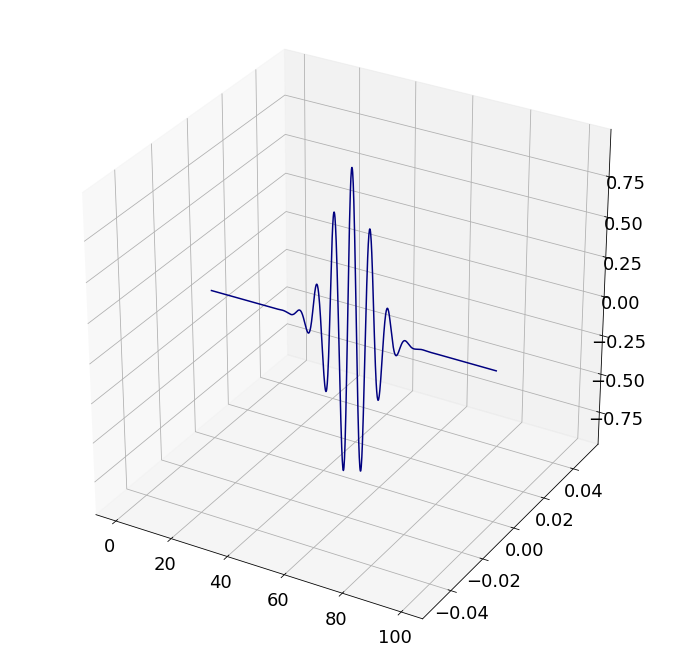

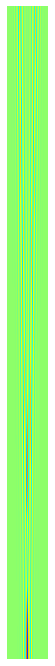

In [89]:
uhat = uhat_ri[:, :N] + (1j)*uhat_ri[:, N:]

u = np.zeros_like(uhat)


for k in range(len(t)):
  u[k, :] = np.fft.ifft(uhat[k, :])
print(u[0,1])
u = u.real


# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plt.set_cmap('jet_r')
u_plot = u[0: -1:10, :]
color = {1:'red', 0: 'blue'}
for j in range(u_plot.shape[0]):
  ys = j*np.ones(u_plot.shape[1])
  if j%250==0:
    ax.plot(x, ys, u_plot[j,:], color= cm.jet(j*40))



plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.set_cmap('jet_r')

plt.show()

In [90]:
import numpy as np
import math
from matplotlib import pyplot as plt
from celluloid import Camera

pi = math.pi
xmin = 0.0
xmax = 100.0
N = 1000 #number of points
x = np.arange(xmin, xmax , (xmax-xmin)/N)


def solution(t):
    p = np.exp(-x**2/(4*k*t))/(np.sqrt(4.*pi*k*t))
    return p

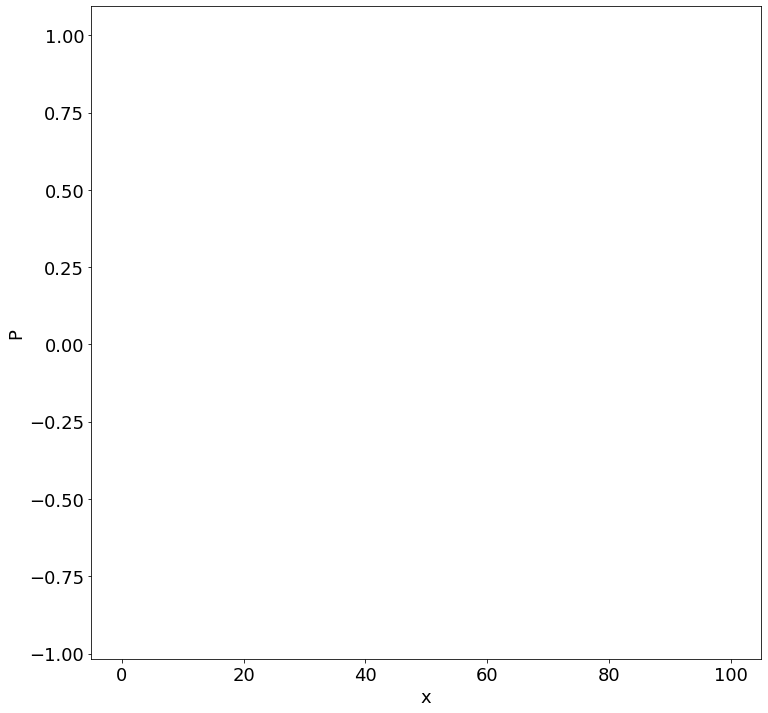

In [93]:

t_final = 100
t_initial = 0.0
t = t_initial
dt = 1
k = 1.0
fig = plt.figure()
camera = Camera(fig)
plt.xlabel('x')
plt.ylabel('P')
while t<t_final:
    t +=dt
    pp = u_plot[int(t),:]

    line = plt.plot(x, pp, 'r-')
    #plt.legend(line, ['t={:.1f}'.format(t)], loc='upper right')
    camera.snap()
animation = camera.animate()
animation.save('animation.mp4')